<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/mlflow/spacy/Spacy_mlflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPACY
spaCy is a modern Python library for industrial-strength Natural Language


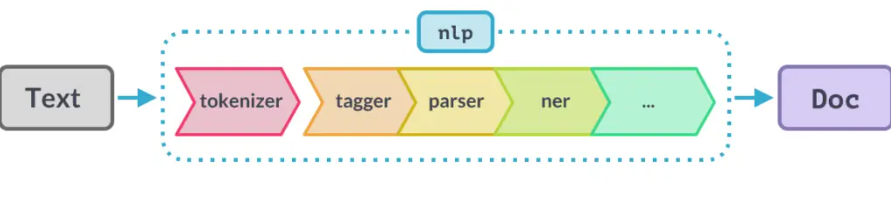



# Install
https://spacy.io/usage


### Models
SpaCy’s trained pipelines can be installed as Python packages. This means that they’re a component of your application, just like any other module. They’re versioned and can be defined as a dependency in your requirements.txt. Trained pipelines can be installed from a download URL or a local directory, manually or via pip. Their data can be located anywhere on your file system.

https://spacy.io/usage/models

### Linguistic Features
https://spacy.io/usage/linguistic-features

### training pipelines and models
https://spacy.io/usage/training

https://spacy.io/usage/processing-pipelines/

In [1]:
%pip install -U  mlflow==2.14.1  pyngrok  nltk spacy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 13.9 MB/s eta 0:00:00


In [47]:
import spacy
from pyngrok import ngrok

In [48]:
spacy.__version__

'3.7.5'

In [30]:
get_ipython().system_raw("mlflow ui --port 5000 &")


# Terminate open tunnels if exist
ngrok.kill()

In [31]:
from google.colab import userdata
NGROK_AUTH_TOKEN  = userdata.get('NGROK')

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://6b16-34-80-105-206.ngrok-free.app


In [5]:
import random

import spacy
from packaging.version import Version
from spacy.util import compounding, minibatch
from spacy.training import Example
import mlflow.spacy

IS_SPACY_VERSION_NEWER_THAN_OR_EQUAL_TO_3_0_0 = Version(spacy.__version__) >= Version("3.0.0")
IS_SPACY_VERSION_NEWER_THAN_OR_EQUAL_TO_3_0_0

True

In [49]:
text = """
Baremo 2015   NO OK  516 paginas

BAREMO_AMA_BOE_RD_1971-1999 OK

BAREMO_PARA_LA_CALIFICACION_DEL_GRADO_DE_MINUSVALIA_Anexo_I_RD_1971-1999 OK

Clasificación de intervenciòn quirúrgica por nomenclator  OK

Guia de Valoración Profesional NO OK 1137 paginas y tamano mayor de 7mb

GUIA_DE_VALORACION_DE_INCAPACIDAD_LABORAL_PARA_AP  NO OK 320 paginas

Ley Enjuciamiento Civil NO OK 360 paginas

Proyecto de Ley Valoracion daÃ±os OK

Tabla combinada OK

Tabla indenizaciones ok

Valoración del INSS de enfermedades para incapacidades NO OK 430 paginas


enumera las cinco categorías o clases de discapacidad
"""

In [51]:
nlp = spacy.blank("en")

In [52]:
nlp.pipe_names

[]

In [54]:
nlp.tokenizer

In [53]:
nlp.config

{'paths': {'train': None, 'dev': None, 'vectors': None, 'init_tok2vec': None},
 'system': {'seed': 0, 'gpu_allocator': None},
 'nlp': {'lang': 'en',
  'pipeline': [],
  'disabled': [],
  'before_creation': None,
  'after_creation': None,
  'after_pipeline_creation': None,
  'batch_size': 1000,
  'tokenizer': {'@tokenizers': 'spacy.Tokenizer.v1'},
  'vectors': {'@vectors': 'spacy.Vectors.v1'}},
 'components': {},
 'corpora': {'dev': {'@readers': 'spacy.Corpus.v1',
   'path': '${paths.dev}',
   'gold_preproc': False,
   'max_length': 0,
   'limit': 0,
   'augmenter': None},
  'train': {'@readers': 'spacy.Corpus.v1',
   'path': '${paths.train}',
   'gold_preproc': False,
   'max_length': 0,
   'limit': 0,
   'augmenter': None}},
 'training': {'seed': '${system.seed}',
  'gpu_allocator': '${system.gpu_allocator}',
  'dropout': 0.1,
  'accumulate_gradient': 1,
  'patience': 1600,
  'max_epochs': 0,
  'max_steps': 20000,
  'eval_frequency': 200,
  'score_weights': {},
  'frozen_components': 

In [55]:
doc = nlp(text)

In [56]:
doc.text

'\nBaremo 2015   NO OK  516 paginas\n\nBAREMO_AMA_BOE_RD_1971-1999 OK\n\nBAREMO_PARA_LA_CALIFICACION_DEL_GRADO_DE_MINUSVALIA_Anexo_I_RD_1971-1999 OK\n\nClasificación de intervenciòn quirúrgica por nomenclator  OK\n\nGuia de Valoración Profesional NO OK 1137 paginas y tamano mayor de 7mb\n\nGUIA_DE_VALORACION_DE_INCAPACIDAD_LABORAL_PARA_AP  NO OK 320 paginas\n\nLey Enjuciamiento Civil NO OK 360 paginas\n\nProyecto de Ley Valoracion daÃ±os OK \n\nTabla combinada OK\n\nTabla indenizaciones ok\n\nValoración del INSS de enfermedades para incapacidades NO OK 430 paginas\n\n\nenumera las cinco categorías o clases de discapacidad\n'

In [57]:
doc.lang_

'en'

In [58]:
type(doc)

spacy.tokens.doc.Doc

In [59]:
for sen in doc.sents:
  for token in sen:
    print(token.text, token.pos_)


ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [60]:
# python -m spacy download en_core_web_sm
nlp1 = spacy.load("en_core_web_sm")

In [61]:
nlp1.pipe_names


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [16]:
#! python -m spacy download en_core_web_trf --quiet

In [62]:
nlp1b = spacy.load("en_core_web_trf")

In [63]:
nlp1b.pipe_names


['transformer', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [64]:
nlp1b.config

{'paths': {'train': None, 'dev': None, 'vectors': None, 'init_tok2vec': None},
 'system': {'gpu_allocator': 'pytorch', 'seed': 1},
 'nlp': {'lang': 'en',
  'pipeline': ['transformer',
   'tagger',
   'parser',
   'attribute_ruler',
   'lemmatizer',
   'ner'],
  'disabled': [],
  'before_creation': None,
  'after_creation': None,
  'after_pipeline_creation': None,
  'batch_size': 64,
  'tokenizer': {'@tokenizers': 'spacy.Tokenizer.v1'},
  'vectors': {'@vectors': 'spacy.Vectors.v1'}},
 'components': {'transformer': {'factory': 'curated_transformer',
   'all_layer_outputs': False,
   'frozen': False,
   'model': {'@architectures': 'spacy-curated-transformers.RobertaTransformer.v1',
    'vocab_size': 50265,
    'hidden_width': 768,
    'piece_encoder': {'@architectures': 'spacy-curated-transformers.ByteBpeEncoder.v1'},
    'attention_probs_dropout_prob': 0.1,
    'hidden_act': 'gelu',
    'hidden_dropout_prob': 0.1,
    'intermediate_width': 3072,
    'layer_norm_eps': 1e-05,
    'max_posi

In [65]:
doc1 = nlp1(text)

In [66]:
for ent in doc1.ents:
  print(ent.text, ent.label_)

Baremo PERSON
2015 DATE
516 CARDINAL
BAREMO_AMA_BOE_RD_1971-1999 ORG
Clasificación de intervenciòn quirúrgica PERSON
Guia de Valoración Profesional PERSON
1137 DATE
320 CARDINAL
Ley Enjuciamiento Civil WORK_OF_ART
360 CARDINAL
Proyecto de Ley Valoracion ORG
Tabla PERSON
Tabla PERSON
Valoración del INSS de PERSON
430 CARDINAL
cinco categorías o PERSON


In [67]:
for sent in doc1.sents:
  for token in sent:
    print(token.text, token.pos_)



 SPACE
Baremo PROPN
2015 NUM
   SPACE
NO INTJ
OK INTJ
  SPACE
516 NUM
paginas NOUN


 SPACE
BAREMO_AMA_BOE_RD_1971 PROPN
- PUNCT
1999 NUM
OK PROPN


 SPACE
BAREMO_PARA_LA_CALIFICACION_DEL_GRADO_DE_MINUSVALIA_Anexo_I_RD_1971 PROPN
- PUNCT
1999 NUM
OK PROPN


 SPACE
Clasificación PROPN
de PROPN
intervenciòn PROPN
quirúrgica PROPN
por PROPN
nomenclator NOUN
  SPACE
OK ADJ


 SPACE
Guia PROPN
de PROPN
Valoración PROPN
Profesional PROPN
NO INTJ
OK ADJ
1137 NUM
paginas NOUN
y PROPN
tamano PROPN
mayor NOUN
de PROPN
7 PROPN
mb NOUN


 SPACE
GUIA_DE_VALORACION_DE_INCAPACIDAD_LABORAL_PARA_AP PROPN
  SPACE
NO INTJ
OK ADJ
320 NUM
paginas NOUN


 SPACE
Ley PROPN
Enjuciamiento PROPN
Civil PROPN
NO INTJ
OK INTJ
360 NUM
paginas NOUN


 SPACE
Proyecto PROPN
de PROPN
Ley PROPN
Valoracion PROPN
daÃ±os NOUN
OK INTJ


 SPACE
Tabla PROPN
combinada PROPN
OK PROPN


 SPACE
Tabla PROPN
indenizaciones NOUN
ok PROPN


 SPACE
Valoración PROPN
del PROPN
INSS PROPN
de PROPN
enfermedades NOUN
para NOUN
incapacidade

In [68]:
doc1b = nlp1b(text)

In [69]:
for ent in doc1b.ents:
  print(ent.text, ent.label_)

Baremo 2015 DATE
Ley Enjuciamiento PERSON
Proyecto de Ley Valoracion daÃ±os OK 

Tabla PERSON
Tabla PERSON


In [70]:
for sent in doc1b.sents:
  for token in sent:
    print(token.text, token.pos_)


 SPACE
Baremo PROPN
2015 NUM
   SPACE
NO NOUN
OK NOUN
  SPACE
516 NUM
paginas X


 SPACE
BAREMO_AMA_BOE_RD_1971 X
- PUNCT
1999 NUM
OK PROPN


 SPACE
BAREMO_PARA_LA_CALIFICACION_DEL_GRADO_DE_MINUSVALIA_Anexo_I_RD_1971 X
- NUM
1999 NUM
OK PROPN


 SPACE
Clasificación X
de ADP
intervenciòn X
quirúrgica X
por ADP
nomenclator X
  SPACE
OK PROPN


 SPACE
Guia PROPN
de ADP
Valoración PROPN
Profesional PROPN
NO X
OK NOUN
1137 NUM
paginas PROPN
y CCONJ
tamano PROPN
mayor NOUN
de ADP
7 PROPN
mb PROPN


 SPACE
GUIA_DE_VALORACION_DE_INCAPACIDAD_LABORAL_PARA_AP X
  SPACE
NO X
OK NOUN
320 NUM
paginas X


 SPACE
Ley PROPN
Enjuciamiento PROPN
Civil PROPN
NO NOUN
OK PROPN
360 NUM
paginas PROPN


 SPACE
Proyecto PROPN
de ADP
Ley PROPN
Valoracion PROPN
daÃ±os PROPN
OK PROPN


 SPACE
Tabla PROPN
combinada X
OK PROPN


 SPACE
Tabla PROPN
indenizaciones X
ok PROPN


 SPACE
Valoración PROPN
del ADP
INSS PROPN
de ADP
enfermedades X
para ADP
incapacidades PROPN
NO PROPN
OK PROPN
430 NUM
paginas X



 SPACE
en

In [71]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")
#
mlflow.set_experiment("save model Spacy")

<Experiment: artifact_location='mlflow-artifacts:/584347464387416102', creation_time=1719234210680, experiment_id='584347464387416102', last_update_time=1719234210680, lifecycle_stage='active', name='save model Spacy', tags={}>

In [72]:
with mlflow.start_run(run_name="save model") as run :

  # Log the spaCy model using mlflow
  mlflow.spacy.log_model(spacy_model=nlp1, artifact_path="model")
  model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"

2024/06/24 15:16:43 WARNING mlflow.spacy: Generating only the spacy flavor for the provided spacy model. This means the model can be loaded back via `mlflow.spacy.load_model`, but cannot be loaded back using pyfunc APIs like `mlflow.pyfunc.load_model` or via the `mlflow models` CLI commands. MLflow will only generate the pyfunc flavor for spacy models containing a pipeline component that is an instance of spacy.pipeline.TextCategorizer.


In [73]:
model_uri

'runs:/cc537c9deb584810a40d4a619b823c5a/model'

In [74]:
# Load the model using mlflow and use it to predict data
nlp1_load = mlflow.spacy.load_model(model_uri=model_uri)

In [75]:
doc1b = nlp1_load(text)

In [76]:
for ent in doc1b.ents:
  print(ent.text, ent.label_)

Baremo PERSON
2015 DATE
516 CARDINAL
BAREMO_AMA_BOE_RD_1971-1999 ORG
Clasificación de intervenciòn quirúrgica PERSON
Guia de Valoración Profesional PERSON
1137 DATE
320 CARDINAL
Ley Enjuciamiento Civil WORK_OF_ART
360 CARDINAL
Proyecto de Ley Valoracion ORG
Tabla PERSON
Tabla PERSON
Valoración del INSS de PERSON
430 CARDINAL
cinco categorías o PERSON


In [77]:
for sent in doc1b.sents:
  for token in sent:
    print(token.text, token.pos_)


 SPACE
Baremo PROPN
2015 NUM
   SPACE
NO INTJ
OK INTJ
  SPACE
516 NUM
paginas NOUN


 SPACE
BAREMO_AMA_BOE_RD_1971 PROPN
- PUNCT
1999 NUM
OK PROPN


 SPACE
BAREMO_PARA_LA_CALIFICACION_DEL_GRADO_DE_MINUSVALIA_Anexo_I_RD_1971 PROPN
- PUNCT
1999 NUM
OK PROPN


 SPACE
Clasificación PROPN
de PROPN
intervenciòn PROPN
quirúrgica PROPN
por PROPN
nomenclator NOUN
  SPACE
OK ADJ


 SPACE
Guia PROPN
de PROPN
Valoración PROPN
Profesional PROPN
NO INTJ
OK ADJ
1137 NUM
paginas NOUN
y PROPN
tamano PROPN
mayor NOUN
de PROPN
7 PROPN
mb NOUN


 SPACE
GUIA_DE_VALORACION_DE_INCAPACIDAD_LABORAL_PARA_AP PROPN
  SPACE
NO INTJ
OK ADJ
320 NUM
paginas NOUN


 SPACE
Ley PROPN
Enjuciamiento PROPN
Civil PROPN
NO INTJ
OK INTJ
360 NUM
paginas NOUN


 SPACE
Proyecto PROPN
de PROPN
Ley PROPN
Valoracion PROPN
daÃ±os NOUN
OK INTJ


 SPACE
Tabla PROPN
combinada PROPN
OK PROPN


 SPACE
Tabla PROPN
indenizaciones NOUN
ok PROPN


 SPACE
Valoración PROPN
del PROPN
INSS PROPN
de PROPN
enfermedades NOUN
para NOUN
incapacidade

In [78]:
mlflow.end_run()

In [79]:
# create blank model and add ner to the pipeline
nlp = spacy.blank("en")
if IS_SPACY_VERSION_NEWER_THAN_OR_EQUAL_TO_3_0_0:
    ner = nlp.add_pipe("ner", last=True)
else:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)

# Training Data
https://tecoholic.github.io/ner-annotator/

https://prodi.gy/


In [80]:
TRAIN_DATA = [
    ("Who is Shaka Khan?", {"entities": [(7, 17, "PERSON")]}),
    ("I like London and Berlin.", {"entities": [(7, 13, "LOC"), (18, 24, "LOC")]}),
    ('Who is Nishanth?', {
        'entities': [(7, 15, 'PERSON')]
    }),
    ("I like New York and Madrid.", {"entities": [(7, 15 ,"LOC"), (20, 26, "LOC")]}),
    ("I am a Doctor.", {"entities": [(7, 13 ,"PROFESSION")]}),
    ("Mr Taigo is a Engineer.", {"entities": [(0, 2 ,"TITLE"), (3, 8 ,"PERSON"), (14, 22 ,"PROFESSION")]}),
]


# Train and Log Model

In [81]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")
#
mlflow.set_experiment("Train Ner Spacy")

<Experiment: artifact_location='mlflow-artifacts:/439432738244386385', creation_time=1719229179924, experiment_id='439432738244386385', last_update_time=1719229179924, lifecycle_stage='active', name='Train Ner Spacy', tags={}>

In [82]:
params = {"n_iter": 100, "drop": 0.5}
with mlflow.start_run(run_name="train ner") as run :
  mlflow.log_params(params)
  examples = []
  for text, annots in TRAIN_DATA:
      examples.append(Example.from_dict(nlp.make_doc(text), annots))

  nlp.initialize(lambda: examples)
  nlp.begin_training()
  for itn in range(params["n_iter"]):
      random.shuffle(TRAIN_DATA)
      losses = {}
      # batch up the examples using spaCy's minibatch
      for batch in minibatch(examples, size=8):

          nlp.update(
              batch,  # batch of texts
              losses=losses,
          )
      print("Losses", losses)
      mlflow.log_metrics(losses)

  # Log the spaCy model using mlflow
  mlflow.spacy.log_model(spacy_model=nlp, artifact_path="model")
  model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"

  print(f"Model saved in run {mlflow.active_run().info.run_uuid}")

Losses {'ner': 24.666669189929962}
Losses {'ner': 30.913130342960358}
Losses {'ner': 30.431122481822968}
Losses {'ner': 29.613026201725006}
Losses {'ner': 28.240033268928528}
Losses {'ner': 26.16813772916794}
Losses {'ner': 22.985755681991577}
Losses {'ner': 18.397900700569153}
Losses {'ner': 13.860160544514656}
Losses {'ner': 10.673830471932888}
Losses {'ner': 9.377798768691719}
Losses {'ner': 8.75680191081483}
Losses {'ner': 8.097624407897456}
Losses {'ner': 7.432938870661019}
Losses {'ner': 6.7828967248010485}
Losses {'ner': 5.828896044005724}
Losses {'ner': 10.714425573928652}
Losses {'ner': 7.652235210779175}
Losses {'ner': 6.81817451358026}
Losses {'ner': 5.2041487616182565}
Losses {'ner': 3.3556307585692338}
Losses {'ner': 2.6711970909611935}
Losses {'ner': 1.9214320451862807}
Losses {'ner': 1.2700662979533277}
Losses {'ner': 0.7833924601637889}
Losses {'ner': 0.3873367194083457}
Losses {'ner': 0.23287637784505932}
Losses {'ner': 0.02037768520612815}
Losses {'ner': 0.00434327536

2024/06/24 15:24:53 WARNING mlflow.spacy: Generating only the spacy flavor for the provided spacy model. This means the model can be loaded back via `mlflow.spacy.load_model`, but cannot be loaded back using pyfunc APIs like `mlflow.pyfunc.load_model` or via the `mlflow models` CLI commands. MLflow will only generate the pyfunc flavor for spacy models containing a pipeline component that is an instance of spacy.pipeline.TextCategorizer.


Losses {'ner': 4.213637531983404e-10}
Model saved in run 11f097e044704c098a1c7e4a2c0d95cf


In [13]:
# mlflow.end_run()

In [83]:
# Load the model using mlflow and use it to predict data
nlp2 = mlflow.spacy.load_model(model_uri=model_uri)
for text, _ in TRAIN_DATA:
    doc = nlp2(text)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('New York', 'LOC'), ('Madrid', 'LOC')]
Tokens [('I', '', 2), ('like', '', 2), ('New', 'LOC', 3), ('York', 'LOC', 1), ('and', '', 2), ('Madrid', 'LOC', 3), ('.', '', 2)]
Entities [('Nishanth', 'PERSON')]
Tokens [('Who', '', 2), ('is', '', 2), ('Nishanth', 'PERSON', 3), ('?', '', 2)]
Entities [('Mr', 'TITLE'), ('Taigo', 'PERSON'), ('Engineer', 'PROFESSION')]
Tokens [('Mr', 'TITLE', 3), ('Taigo', 'PERSON', 3), ('is', '', 2), ('a', '', 2), ('Engineer', 'PROFESSION', 3), ('.', '', 2)]
Entities [('Shaka Khan', 'PERSON')]
Tokens [('Who', '', 2), ('is', '', 2), ('Shaka', 'PERSON', 3), ('Khan', 'PERSON', 1), ('?', '', 2)]
Entities [('Doctor', 'PROFESSION')]
Tokens [('I', '', 2), ('am', '', 2), ('a', '', 2), ('Doctor', 'PROFESSION', 3), ('.', '', 2)]
Entities [('London', 'LOC'), ('Berlin', 'LOC')]
Tokens [('I', '', 2), ('like', '', 2), ('London', 'LOC', 3), ('and', '', 2), ('Berlin', 'LOC', 3), ('.', '', 2)]


In [84]:
nlp2.pipe_names

['ner']

In [85]:
mlflow.end_run()